# pythia-level-threshold

In [133]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from utils import utils, stats
from importlib import reload

In [134]:
#exp_name = 'exp_spec06mini'
#exp_name = 'exp_spec06mini_llc_aware'
#exp_name = 'exp_spec06mini_llc_aware_gamma_0'
exp_name = 'exp_spec06mini_llc_aware_separate_eq'
#exp_name = 'exp_spec06mini_llc_aware_gamma_0_separate_eq'

data_path = f'/u/cmolder/GitHub/Pythia/out/pythia_level/{exp_name}.csv'
weight_path = '/scratch/cluster/cmolder/traces/prefetcher_zoo/champsim/weights.txt'

# Add SPEC results.
df = utils.read_data_file(data_path)
weights = utils.read_weights_file(weight_path)
#weights

In [135]:
#pd.set_option('display.max_rows', 100)
#df[(df.full_trace == 'astar_313B')]

In [136]:
reload(utils)
reload(stats)
weighted_df = stats.get_weighted_statistics(df, weights) # Weighted by simpoint
#weighted_df[weighted_df.trace == 'astar']

[DEBUG] ('no', 'pythia', 'no') sphinx3 10.0 not found
[DEBUG] ('no', 'pythia', 'no') sphinx3 5.0 not found


---
## Metrics of each static threshold
- How does each static threshold compare to regular Pythia, and no prefetcher?

In [137]:
def plot_metric(wdf, metric, dpi=192):
    wdf = wdf[ 
        wdf.pythia_level_threshold == float('-inf')
        #& wdf.all_pref.apply(lambda x : x == ('no', 'pythia', 'no') or x == ('no', 'double_pythia', 'no'))
    ]
    
    fig, ax = plt.subplots(dpi=dpi)
    
    for i, tr in enumerate(wdf.trace.unique()):
        rows = wdf[wdf.trace == tr]
        
        ax.bar(
            3*i, rows[rows.all_pref.apply(lambda x : x == ('no', 'pythia', 'no'))][metric].item(), 
            label='Regular Pythia' if i == 0 else None, color='C0'
        )
        ax.bar(
            3*i+1, rows[rows.all_pref.apply(lambda x : x == ('no', 'double_pythia', 'no'))][metric].item(), 
            label='Double Pythia' if i == 0 else None, color='C1'
        )
        
    ax.set_xticks(np.arange(0, len(wdf.trace.unique()))*3 + 0.5)
    ax.set_xticklabels(list(wdf.trace.unique()), rotation=45)
        
    ax.set_xlabel('Trace')
    ax.set_ylabel(metric)
        
    fig.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    fig.suptitle(f'{metric}')
    fig.tight_layout()

In [138]:
def plot_threshold_metric(wdf, trace, metric, dpi=192):
    wdf = wdf[wdf.trace == trace]#[['pythia_level_threshold', metric]])
    wdf = wdf.sort_values(['pythia_level_threshold'])
    #display(wdf)
    X, y = wdf.pythia_level_threshold.to_numpy(), wdf[metric].to_numpy()
    
    fig, ax = plt.subplots(dpi=dpi)
    ax.plot(np.arange(0, len(y)), y, marker='.')
    
    ax.set_xticks(np.arange(0, len(y)))
    ax.set_xticklabels([
        'Double' if row.all_pref == ('no', 'double_pythia', 'no') else
        'Regular' if row.pythia_level_threshold == float('-inf') else 
        str(row.pythia_level_threshold) 
        for _, row in wdf.iterrows()
    ], rotation=45)
                          
    ax.set_xlabel('Static level threshold')
    ax.set_ylabel(metric)
    #ax.set_ylim(ymin=0)
    
    plt.axhline(y=y[1], linewidth=0.75, ls='--', color='red') # Regular Pythia baseline
    plt.axhline(y=y[0], linewidth=0.75, ls='--', color='green') # Double Pythia baseline
    #plt.axhline(y=0, linewidth=0.75, ls='--', color='black') # No prefetcher baseline
    
    fig.suptitle(f'{trace} {metric}')
    fig.tight_layout()

In [139]:
def plot_conf_prefetches(wdf, trace,  dpi=192):
    wdf = wdf[wdf.trace == trace]#[['pythia_level_threshold', metric]])
    wdf = wdf.sort_values(['pythia_level_threshold'])
    X, y_low, y_high = wdf.pythia_level_threshold.to_numpy(), wdf.pythia_low_conf_prefetches.to_numpy(), wdf.pythia_high_conf_prefetches.to_numpy()
    
    fig, ax = plt.subplots(dpi=dpi)
    ax.plot(np.arange(0, len(y_low)), y_low, marker='.', label='low')
    ax.plot(np.arange(0, len(y_high)), y_high, marker='.', label='high')
    ax.plot(np.arange(0, len(y_high)), y_low + y_high, ls='--', label='total')
    
    ax.set_xticks(np.arange(0, len(y_low)))
    ax.set_xticklabels([
        'Double' if row.all_pref == ('no', 'double_pythia', 'no') else
        'Regular' if row.pythia_level_threshold == float('-inf') else 
        str(row.pythia_level_threshold) 
        for _, row in wdf.iterrows()
    ], rotation=45)
                          
    ax.set_xlabel('Static level threshold')
    ax.set_ylabel('Number of prefetches')
    #ax.set_ylim(ymin=0)
    
    fig.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    fig.suptitle(f'{trace} Prefetch confidence')
    fig.tight_layout()

In [140]:
os.makedirs(f'./plots/pythia_level_threshold/{exp_name}/ipc_improvement', exist_ok=True)
os.makedirs(f'./plots/pythia_level_threshold/{exp_name}/L2C_mpki_reduction', exist_ok=True)
os.makedirs(f'./plots/pythia_level_threshold/{exp_name}/LLC_mpki_reduction', exist_ok=True)
os.makedirs(f'./plots/pythia_level_threshold/{exp_name}/pythia_confidence', exist_ok=True)

# Regular vs. Double Pythia

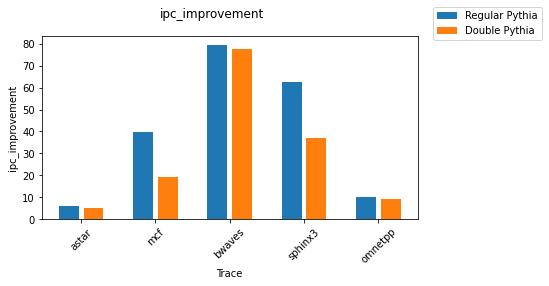

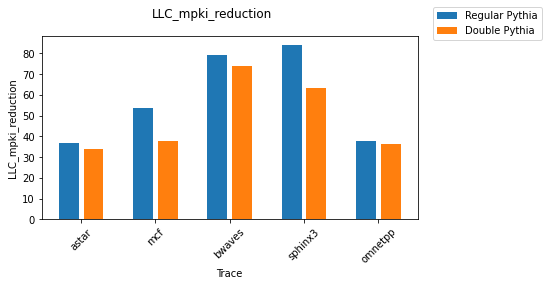

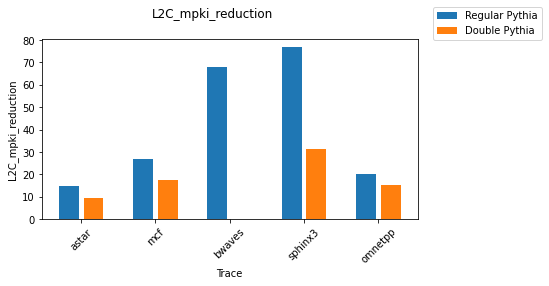

In [141]:
dpi=None

for metric in ['ipc_improvement', 'LLC_mpki_reduction', 'L2C_mpki_reduction']:
    plot_metric(weighted_df, metric, dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/{exp_name}/{metric}.pdf', bbox_inches='tight')

---
# Per-trace static thresholds

## IPC improvement

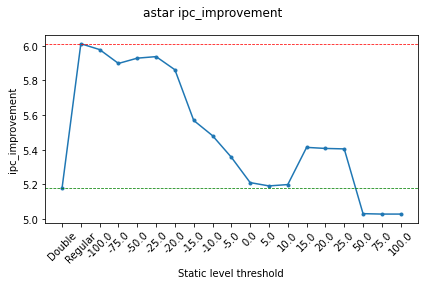

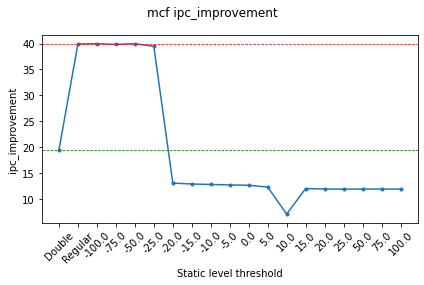

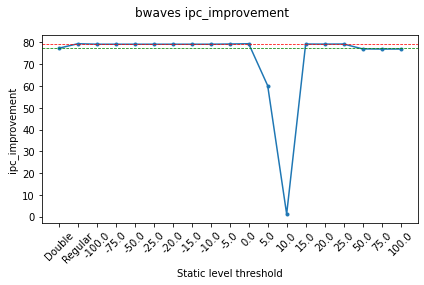

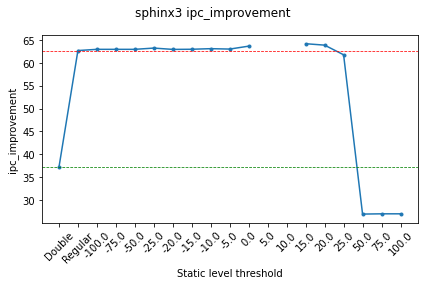

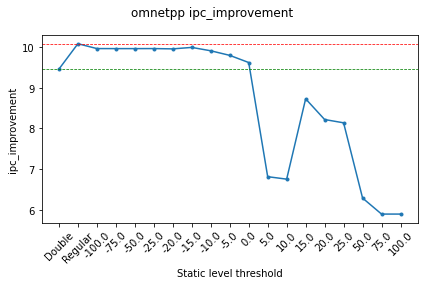

In [142]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'ipc_improvement', dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/{exp_name}/ipc_improvement/{tr}_ipc_improvement.pdf', bbox_inches='tight')

## LLC MPKI reduction

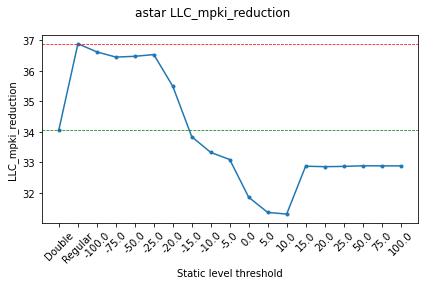

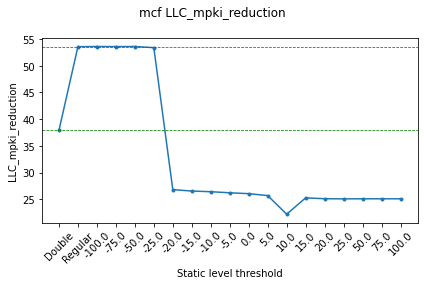

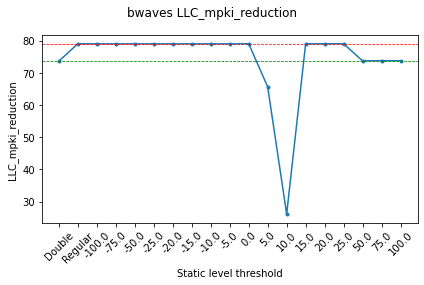

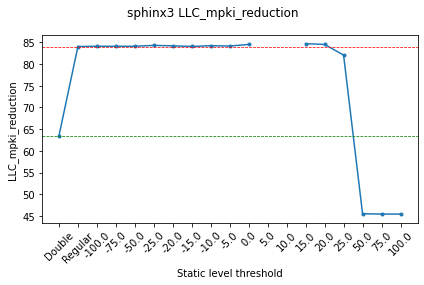

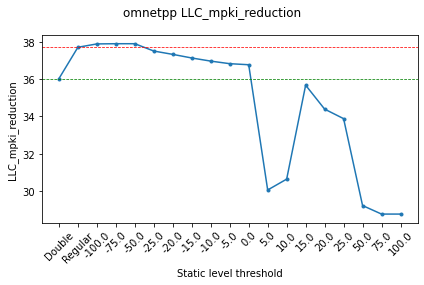

In [143]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'LLC_mpki_reduction', dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/{exp_name}/LLC_mpki_reduction/{tr}_LLC_mpki_reduction.pdf', bbox_inches='tight')

## L2C MPKI reduction

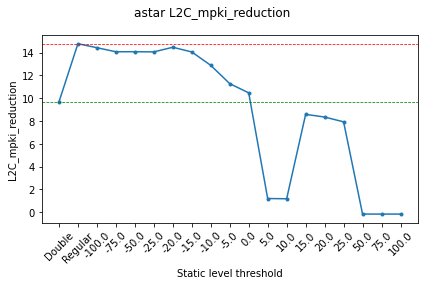

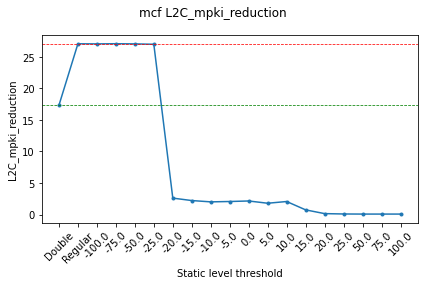

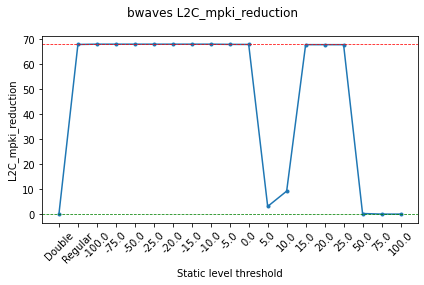

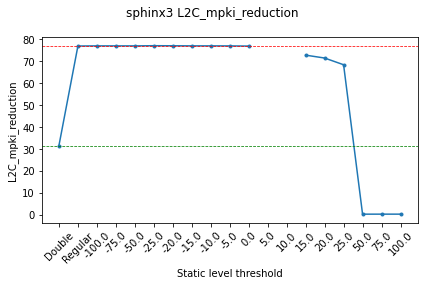

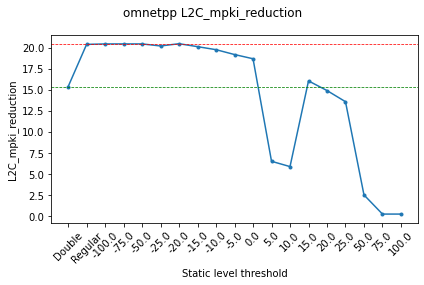

In [144]:
for tr in weighted_df.trace.unique():
    plot_threshold_metric(weighted_df, tr, 'L2C_mpki_reduction', dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/{exp_name}/L2C_mpki_reduction/{tr}_L2C_mpki_reduction.pdf', bbox_inches='tight')

## Low vs. high confidence prefetches

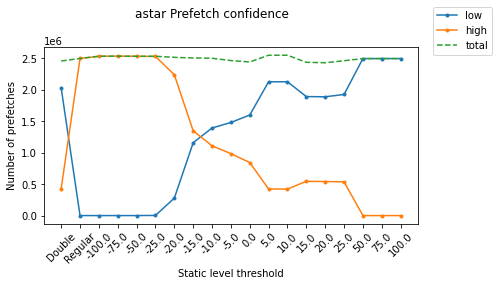

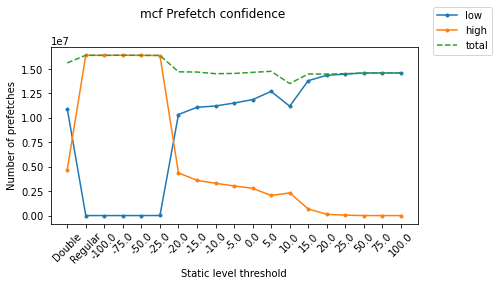

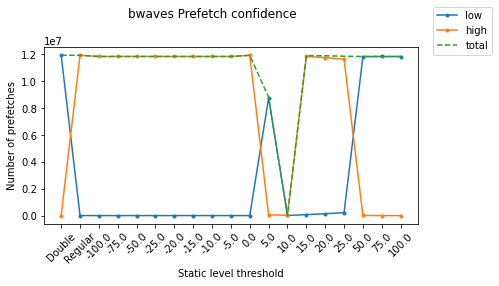

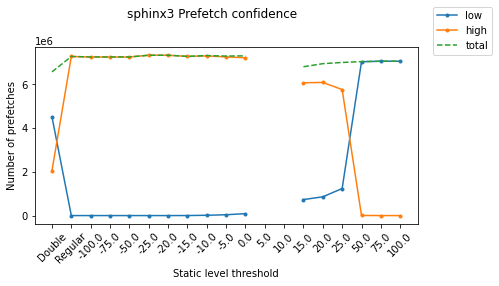

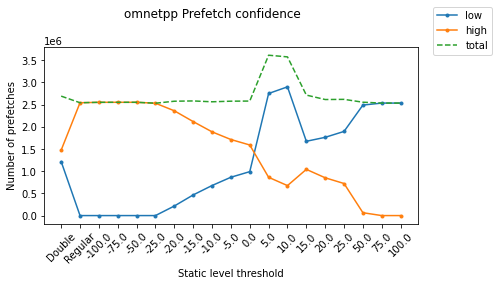

In [145]:
for tr in weighted_df.trace.unique():
    plot_conf_prefetches(weighted_df, tr, dpi=dpi)
    plt.savefig(f'./plots/pythia_level_threshold/{exp_name}/pythia_confidence/{tr}_pythia_confidence.pdf', bbox_inches='tight')